#### LAB: LOGISTIC REGRESSION

In [1]:
%pip install -U scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 8.6 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.7.0
    Uninstalling scikit-learn-1.7.0:
      Successfully uninstalled scikit-learn-1.7.0
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,ConfusionMatrixDisplay, precision_recall_fscore_support, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# set a random state
rs = 123

In [4]:
# load data

dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML241EN-SkillsNetwork/labs/datasets/food_items.csv"
food_df = pd.read_csv(dataset_url)

In [5]:
# check column types
food_df.dtypes

Calories               float64
Total Fat                int64
Saturated Fat          float64
Monounsaturated Fat    float64
Polyunsaturated Fat    float64
Trans Fat              float64
Cholesterol              int64
Sodium                 float64
Total Carbohydrate     float64
Dietary Fiber          float64
Sugars                 float64
Sugar Alcohol            int64
Protein                float64
Vitamin A                int64
Vitamin C                int64
Calcium                  int64
Iron                     int64
class                   object
dtype: object

In [6]:
food_df.head()

,Calories,Total Fat,Saturated Fat,Monounsaturated Fat,Polyunsaturated Fat,Trans Fat,Cholesterol,Sodium,Total Carbohydrate,Dietary Fiber,Sugars,Sugar Alcohol,Protein,Vitamin A,Vitamin C,Calcium,Iron,class
0,149.0,0,0.0,0.0,0.0,0.0,0,9.0,9.8,0.0,0.0,0,1.3,0,0,0,0,'In Moderation'
1,123.0,0,0.0,0.0,0.0,0.0,0,5.0,6.6,0.0,0.0,0,0.8,0,0,0,0,'In Moderation'
2,150.0,0,0.0,0.0,0.0,0.0,0,4.0,11.4,0.0,0.0,0,1.3,0,0,0,0,'In Moderation'
3,110.0,0,0.0,0.0,0.0,0.0,0,6.0,7.0,0.0,0.0,0,0.8,0,0,0,0,'In Moderation'
4,143.0,0,0.0,0.0,0.0,0.0,0,7.0,13.1,0.0,0.0,0,1.0,0,0,0,0,'In Moderation'


In [10]:
# get the row entries with col 0 to -1 (16)

feature_col = list(food_df.iloc[:, :-1].columns)
feature_col

['Calories',
 'Total Fat',
 'Saturated Fat',
 'Monounsaturated Fat',
 'Polyunsaturated Fat',
 'Trans Fat',
 'Cholesterol',
 'Sodium',
 'Total Carbohydrate',
 'Dietary Fiber',
 'Sugars',
 'Sugar Alcohol',
 'Protein',
 'Vitamin A',
 'Vitamin C',
 'Calcium',
 'Iron']

In [12]:
# descriptive statistics

food_df.iloc[:, :-1].describe()

,Calories,Total Fat,Saturated Fat,Monounsaturated Fat,Polyunsaturated Fat,Trans Fat,Cholesterol,Sodium,Total Carbohydrate,Dietary Fiber,Sugars,Sugar Alcohol,Protein,Vitamin A,Vitamin C,Calcium,Iron
count,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000
mean,133.861086,4.475264,1.450617,0.338069,0.254660,0.047459,8.857692,241.867142,18.232020,1.602971,6.645234,0.117949,4.661333,6.287632,6.741855,5.175264,5.235671
std,94.227650,5.386340,2.410318,1.345852,2.230586,0.321402,20.976530,272.284363,14.786316,3.363879,8.328465,1.121529,5.611143,18.374191,23.785100,8.779637,9.119459
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,120.000000,3.000000,0.500000,0.000000,0.000000,0.000000,0.000000,135.000000,17.000000,1.000000,3.000000,0.000000,3.000000,0.000000,0.000000,2.000000,2.000000
75%,180.000000,7.000000,2.000000,0.000000,0.000000,0.000000,10.000000,370.000000,27.000000,2.000000,11.000000,0.000000,7.000000,6.000000,2.000000,6.000000,8.000000
max,2210.000000,43.000000,22.000000,40.000000,235.000000,11.000000,450.000000,2431.000000,270.000000,305.000000,115.000000,31.000000,70.000000,622.000000,1000.000000,110.000000,170.000000


* As we see, this dataset contains 17 nutrient categories about each food item. These categories include Calories, Total Fat, Protein, Sugar, etc., and are listed as numeric variables. As such, we only need to scale them for training our logistic regression model so that we can compare our feature coefficients directly.

In [ ]:
# check the target variable in the class column 
# to see the label values and their distribution.
# get the row entries with the last col 'class'

food_df.iloc[:, -1].value_counts(normalize=True)

class
'In Moderation'    0.501433
'Less Often'       0.423906
'More Often'       0.074661
Name: proportion, dtype: float64

<Axes: xlabel='class'>

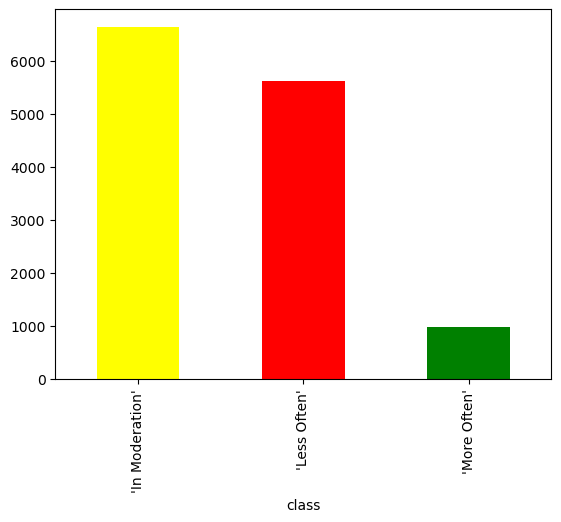

In [15]:
food_df.iloc[:,-1].value_counts().plot.bar(color=['yellow', 'red','green'])

* A multinomial logistic regression is a generalized logistic regression model which generates a probability distribution over all classes, based on the logits or exponentiated log-odds calculated for each class (usually more than two).

* a multinomial logistic regression model is different from the `one-vs-rest` binary logistic regression. For `one-vs-rest` schema, you need to train an independent classifier for each class. For example, you need a `More Often` classifier to differentiate a food item between `More Often` and `Not More Often` (or, `In Moderation` and `Less Often`).

In [16]:
# FEATURE ENGINEERING

X_raw = food_df.iloc[:, :-1]
y_raw = food_df.iloc[:, -1:]

In [17]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()

In [18]:
# Scaling the raw input features
X = scaler.fit_transform(X_raw)

In [19]:
print(f"The range of feature inputs are within {X.min()} to {X.max()}")

The range of feature inputs are within 0.0 to 1.0


For the target variable y, let's use the LabelEncoder provided by sklearn to encode its three class values.

In [20]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()

In [22]:
y = label_encoder.fit_transform(y_raw.values.ravel())
# Note that ravel() function flattens the vector.

# The encoded target variable will only contain values
# 0=In Moderation, 1=Less Often, 2=More Often.

In [23]:
np.unique(y, return_counts=True)

(array([0, 1, 2]), array([6649, 5621,  990]))

### Train logistic regression models

First, let's split the dataset into a training and a testing dataset. Training dataset will be used to train and (maybe) tune models, and testing dataset will be used to evaluate the models. Note that you may also split the training dataset into train and validation sets where the validation dataset is only used to tune the model and to set the model parameters.

In [24]:
# First, let's split the training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = rs)

In [25]:
print(f"Training dataset shape, X_train: {X_train.shape}, y_train: {y_train.shape}")

Training dataset shape, X_train: (10608, 17), y_train: (10608,)


In [26]:
print(f"Testing dataset shape, X_test: {X_test.shape}, y_test: {y_test.shape}")

Testing dataset shape, X_test: (2652, 17), y_test: (2652,)


In [29]:
# define a sklearn.linear_model.LogisticRegression model with following arguments:

# L2 penalty to shrink coefficients without removing any features from the model
penalty= 'l2'
# Our classification problem is multinomial
multi_class = 'multinomial'
# Use lbfgs for L2 penalty and multinomial classes
solver = 'lbfgs'
# Max iteration = 1000
max_iter = 1000

In [30]:
# Define a logistic regression model with above arguments
l2_model = LogisticRegression(random_state=rs, penalty=penalty, multi_class=multi_class, solver=solver, max_iter=max_iter)

In [31]:
# Let's train the model with training input data X_train and labels y_train:

l2_model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,123
,solver,'lbfgs'
,max_iter,1000
,multi_class,'multinomial'


In [32]:
l2_preds = l2_model.predict(X_test)

* Because we may need to evaluate the model multiple times with different model hyper parameters, here we define an utility method to take the ground truths y_test and the predictions preds, and return a Python dict with accuracy, recall, precision, and f1score.

In [33]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp)
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

In [34]:
evaluate_metrics(y_test, l2_preds)

{'accuracy': 0.7748868778280543,
 'recall': array([0.87368421, 0.73220641, 0.35353535]),
 'precision': array([0.73035827, 0.83553299, 0.92105263]),
 'f1score': array([0.79561794, 0.78046468, 0.51094891])}

* As demonstrated the above evaluation results, the logistic regression model has relatively good performance on this multinomial classification task. The overall accuracy is around 0.77 and the f1score is around 0.8. Note that for recall, precision, and f1score, we output the values for each class to see how the model performs on an individual class. And, we can see from the results, the recall for class=2 (More often) is not very good. This is actually a common problem called imbalanced classification challenge. 

In [37]:
# let's try defining another logistic regression model with l1 penality 
# this time, to see if our classification performance would be improved.


# L1 penalty to shrink coefficients without removing any features from the model
penalty= 'l1'
# Our classification problem is multinomial
multi_class = 'multinomial'
# Use saga for L1 penalty and multinomial classes
solver = 'saga'
# Max iteration = 1000
max_iter = 1000

In [38]:
# Define a logistic regression model with above arguments
l1_model = LogisticRegression(random_state=rs, penalty=penalty, multi_class=multi_class, solver=solver, max_iter = 1000)

In [39]:
l1_model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l1'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,123
,solver,'saga'
,max_iter,1000
,multi_class,'multinomial'


In [40]:
l1_preds = l1_model.predict(X_test)

* check the class probability distribution using the predict_proba function. For example, we want to see the probabilities of belonging to each class for the first instance in the test dataset:

In [41]:
odd_ratios = l1_model.predict_proba(X_test[:1, :])[0]
odd_ratios

array([3.55065558e-02, 9.64491964e-01, 1.47991419e-06])

We can see that Class 1 has the largest probability 0.96. As such, the model prediction for this instance will be class 1 and this is the same as the predict method.

In [42]:
l1_model.predict(X_test[:1, :])[0]

1

* Given the true labels (`y_test`) and predictions, we can evaluate the model performance by calling the utility `evaluate_metrics`  method.

In [43]:
evaluate_metrics(y_test, l1_preds)

{'accuracy': 0.8092006033182504,
 'recall': array([0.85488722, 0.74377224, 0.87373737]),
 'precision': array([0.78848821, 0.83516484, 0.8277512 ]),
 'f1score': array([0.82034632, 0.78682353, 0.85012285])}

* we can see this logistic regression with l1 penalty has much better performance than l2. One possible reason is that l1 penalty may remove some correlated feature variables by shrinking their coefficents to zero. As such, the model is much simplified to avoid overfitting on the training data and better aligned with the logistic regression assumption that all features should be independent.

### Confusion Matrix

We can also plot the confusion matrix based on the true labels and predictions using the confusion_matrix method provided by sklearn,

In [44]:
cf = confusion_matrix(y_test, l1_preds, normalize='true')

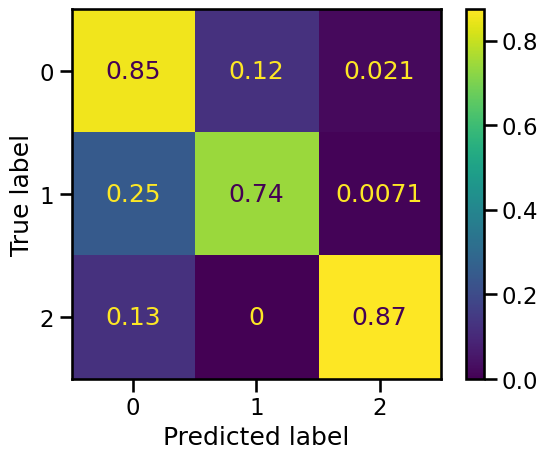

In [45]:
sns.set_context('talk')
disp = ConfusionMatrixDisplay(confusion_matrix=cf,display_labels=l1_model.classes_)
disp.plot()
plt.show()

One way to interpret logistic regression models is by analyzing feature coefficients. Although it may not be as effective as the regular linear regression models because the logistic regression model has a sigmoid function, we can still get a sense for the importance or impact of each feature.  

In [46]:
l1_model.coef_

array([[ 1.02260612e+01,  0.00000000e+00,  0.00000000e+00,
         5.28211590e+00,  0.00000000e+00, -3.70560617e+00,
         0.00000000e+00,  9.11923717e-01,  0.00000000e+00,
         2.26627496e+01,  0.00000000e+00,  0.00000000e+00,
         4.30564271e+00,  1.36942545e-01,  0.00000000e+00,
         1.83340368e+00, -2.06761520e-02],
       [ 0.00000000e+00,  4.20223530e+00,  2.46648466e+01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         4.94277520e+00,  0.00000000e+00,  1.32251480e+00,
        -6.79834695e+00,  1.51669845e+01,  3.46648083e+00,
         0.00000000e+00, -1.71144958e+00,  0.00000000e+00,
        -1.47866235e-01,  0.00000000e+00],
       [-1.11431018e+02, -2.91410454e+01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -1.59642876e+00, -4.13437893e+01,
         0.00000000e+00, -9.27079323e-01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.0

The `coef_` is a coefficients list with three elements, one element is the actual coefficent for class 0, 1, 2. To better analyze the coefficients, let's use three utility methods to sort and visualize them.

In [47]:
# Extract and sort feature coefficients
def get_feature_coefs(regression_model, label_index, columns):
    coef_dict = {}
    for coef, feat in zip(regression_model.coef_[label_index, :], columns):
        if abs(coef) >= 0.01:
            coef_dict[feat] = coef
    # Sort coefficients
    coef_dict = {k: v for k, v in sorted(coef_dict.items(), key=lambda item: item[1])}
    return coef_dict

# Generate bar colors based on if value is negative or positive
def get_bar_colors(values):
    color_vals = []
    for val in values:
        if val <= 0:
            color_vals.append('r')
        else:
            color_vals.append('g')
    return color_vals

# Visualize coefficients
def visualize_coefs(coef_dict):
    features = list(coef_dict.keys())
    values = list(coef_dict.values())
    y_pos = np.arange(len(features))
    color_vals = get_bar_colors(values)
    plt.rcdefaults()
    fig, ax = plt.subplots()
    ax.barh(y_pos, values, align='center', color=color_vals)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(features)
    # labels read top-to-bottom
    ax.invert_yaxis()  
    ax.set_xlabel('Feature Coefficients')
    ax.set_title('')
    plt.show()

In [52]:
# Get the coefficents for Class 1, Less Often
coef_dict = get_feature_coefs(l1_model, 1, feature_col)

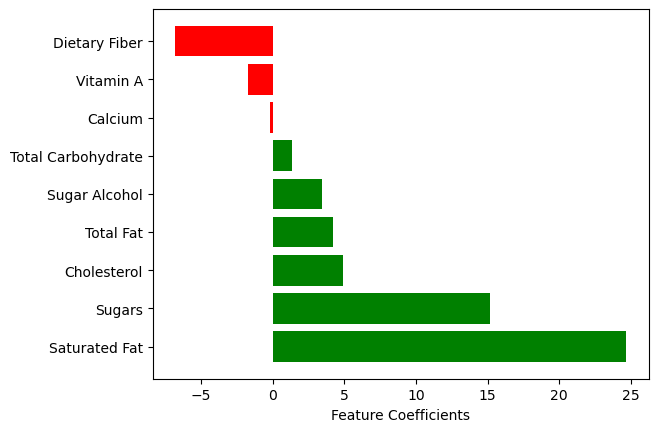

In [53]:
visualize_coefs(coef_dict)

* unhealthy nutrients such as Saturated Fat, Sugars, Cholesterol, Total Fat, etc., have high positive coefficients. Food items containing unhealthy nutrients will have higher coeficients and will be more likely to be categorized in the 'Less Often' class.

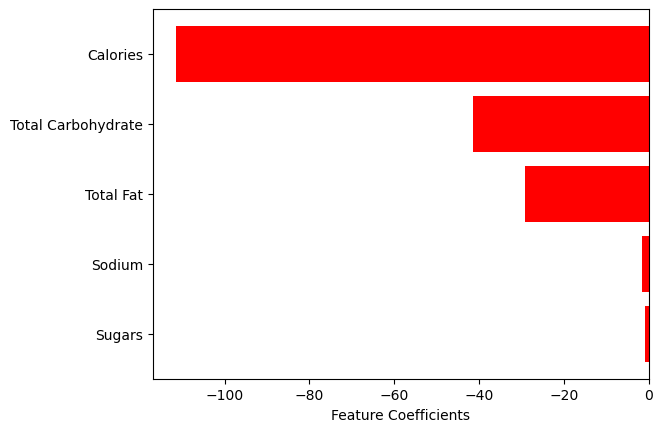

In [55]:
# Coefficients for Class 2
coef_dict = get_feature_coefs(l1_model, 2, feature_col)
visualize_coefs(coef_dict)

* Conversely, if a food item has a high amount of calories, total carbohydrates, and total fat, then it is unlikely to be categorized in the 'More Often' class.

In [56]:
# Define a logistic regression model with elastic-net penalty
elastic_net_model = LogisticRegression(
    random_state=rs,
    penalty='elasticnet',
    multi_class='multinomial',
    solver='saga',
    max_iter=1000,
    l1_ratio=0.5  # l1_ratio must be between 0 and 1 (exclusive)
)

In [57]:
elastic_net_model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'elasticnet'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,123
,solver,'saga'
,max_iter,1000
,multi_class,'multinomial'


In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = elastic_net_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

print("Accuracy:", accuracy)
print("Precision (per class):", precision)
print("Recall (per class):", recall)
print("F1 Score (per class):", f1)

Accuracy: 0.7907239819004525
Precision (per class): [0.75310255 0.83723296 0.87681159]
Recall (per class): [0.86691729 0.73220641 0.61111111]
F1 Score (per class): [0.80601188 0.78120551 0.7202381 ]


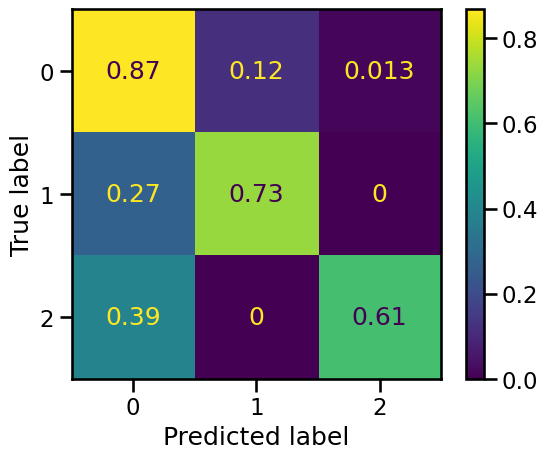

In [59]:
cf = confusion_matrix(y_test, y_pred, normalize='true')
sns.set_context('talk')
disp = ConfusionMatrixDisplay(confusion_matrix=cf, display_labels=elastic_net_model.classes_)
disp.plot()
plt.show()

In [60]:
# Analyze and interpret the coefficients for each class in the elastic_net_model

for class_idx, class_label in enumerate(elastic_net_model.classes_):
    print(f"Top coefficients for class {class_label}:")
    coefs = elastic_net_model.coef_[class_idx]
    coef_series = pd.Series(coefs, index=feature_col)
    # Show top positive and negative features
    top_positive = coef_series.sort_values(ascending=False).head(5)
    top_negative = coef_series.sort_values().head(5)
    print("  Most positive influence:")
    print(top_positive)
    print("  Most negative influence:")
    print(top_negative)
    print("-" * 40)

Top coefficients for class 0:
  Most positive influence:
Calories               12.221639
Total Carbohydrate      5.754662
Protein                 5.011956
Dietary Fiber           3.430530
Monounsaturated Fat     3.048646
dtype: float64
  Most negative influence:
Saturated Fat   -8.964705
Sugars          -2.475246
Trans Fat       -1.769489
Cholesterol     -1.573031
Sugar Alcohol   -0.654167
dtype: float64
----------------------------------------
Top coefficients for class 1:
  Most positive influence:
Saturated Fat         12.775123
Sugars                11.824065
Total Fat              7.205919
Total Carbohydrate     5.702132
Cholesterol            3.737549
dtype: float64
  Most negative influence:
Dietary Fiber         -2.614918
Monounsaturated Fat   -1.930273
Vitamin A             -1.525319
Polyunsaturated Fat   -0.010964
Iron                   0.000000
dtype: float64
----------------------------------------
Top coefficients for class 2:
  Most positive influence:
Polyunsaturated Fa